In [10]:
import pandas as pd

In [14]:
ds = pd.read_excel("../CountyFair.xlsx")

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Card No.                                                                           95 non-null     object
 1   Here I am in the year 2050, and I want to tell you why Arlington is so fantastic…  95 non-null     object
 2   Translation (when applicable)                                                      6 non-null      object
 3   Getting here wasn't easy, but it was worth it! Here is how we did it:              57 non-null     object
 4   Translation (when applicable).1                                                    1 non-null      object
dtypes: object(5)
memory usage: 3.8+ KB


In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Card No.                                                                           95 non-null     object
 1   Here I am in the year 2050, and I want to tell you why Arlington is so fantastic…  95 non-null     object
 2   Translation (when applicable)                                                      6 non-null      object
 3   Getting here wasn't easy, but it was worth it! Here is how we did it:              57 non-null     object
 4   Translation (when applicable).1                                                    1 non-null      object
dtypes: object(5)
memory usage: 3.8+ KB


In [17]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [25]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

string_list = ds['Here I am in the year 2050, and I want to tell you why Arlington is so fantastic…'].tolist()
spanish_list = ds['Translation (when applicable)'].tolist()
IndexCounter = 0
for n in spanish_list: # Gets non null values from the spanish translated list, if they're not null then it appends to the corresponding index of the main list.
    workingstring = str(n)
    if workingstring != 'nan':
        string_list[IndexCounter] = workingstring
    IndexCounter += 1

/Users/1007364/Library/Python/3.11/lib/python/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


['Stop overbuilding and over taxing now!', 'Arlington is a safe and appreciated community.', 'Yo trabajo en Extended Day y los pagos son muy poco y también sé que los padres pagan por todo el mes y nosotros no tenemos beneficios trabajamos 10 meses y solo nos pagan por 8 meses. Cómo vamos a sobrevivir con tan poco sueldo por eso los empleados se van.', 'Boston Park, Glebe and Pershing  todoman muchos la inseguridad de camonar. Toman bebidas en las calles. Necesitamos control', 'Bring more psicholohists to schools. More affordable rent. More resources for mental health', 'Redo the set back rule. The B2A process is outdated andinvasive for 2024. Also, more parks and recreation centers.', 'More affordable rent', 'Diverse (people, generations, etc.) Affordable. Thriving communities. Proud to live here.', 'I was born in South Arlington and I love the culture and history.', 'Because we eliminated polluting cars, trucks, other vehicles and buildings. We stopped global warming.', 'We have fina

In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pol_list = []
sub_list = []
for entry in string_list:
    doc = nlp(entry)
    pol_list.append(doc._.blob.polarity)
    sub_list.append(doc._.blob.subjectivity)

['Stop overbuilding and over taxing now!', 'Arlington is a safe and appreciated community.', 'I work in Extended Day and pay is very low. I also know that parents pay for the entire month. We do not have benefits working 10 months, we just get paid for 8 months. How can we survive with so little salary? That is why employees leave.', 'Boston Park, Glebe and Pershing- there is insecurity while walkiing. They drink alcohol in the streets. We need control.', 'Bring more psicholohists to schools. More affordable rent. More resources for mental health', 'Redo the set back rule. The B2A process is outdated andinvasive for 2024. Also, more parks and recreation centers.', 'More affordable rent', 'Diverse (people, generations, etc.) Affordable. Thriving communities. Proud to live here.', 'I was born in South Arlington and I love the culture and history.', 'Because we eliminated polluting cars, trucks, other vehicles and buildings. We stopped global warming.', 'We have finally been able to provi

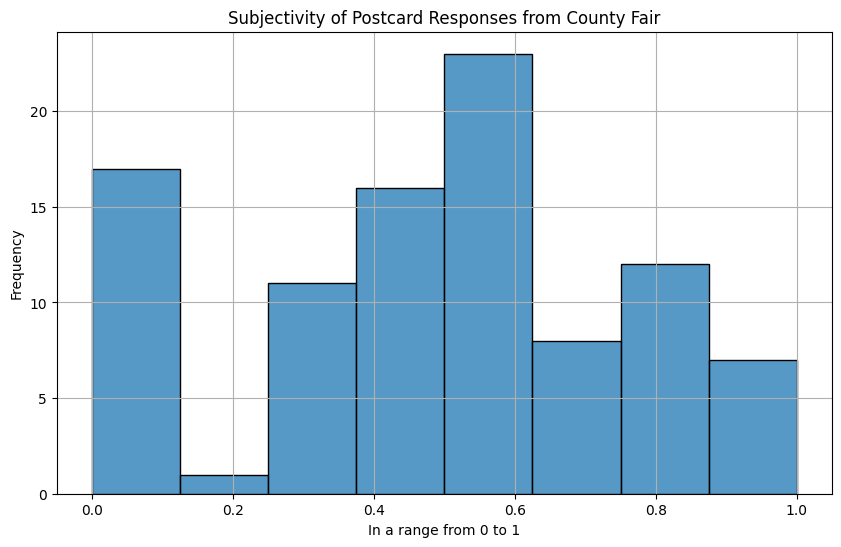

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sub_list)
plt.title('Subjectivity of Postcard Responses from County Fair')
plt.xlabel('In a range from 0 to 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

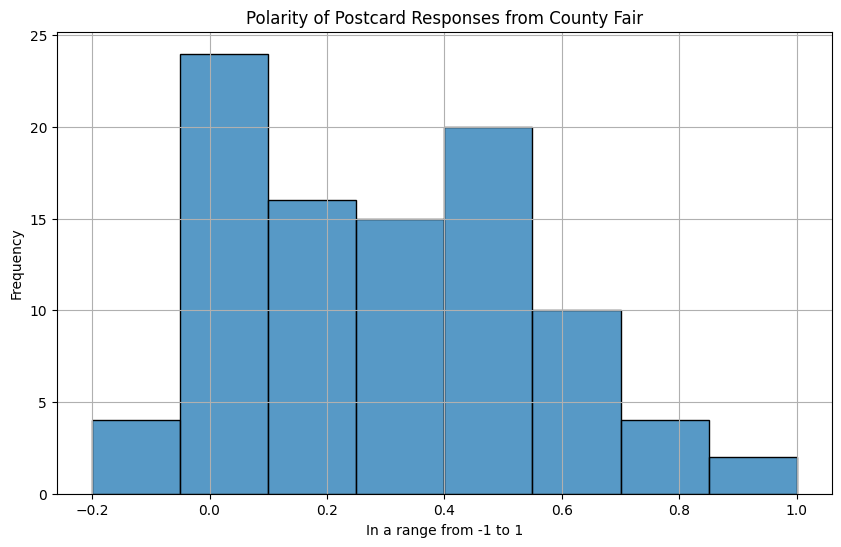

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=pol_list)
plt.title('Polarity of Postcard Responses from County Fair')
plt.xlabel('In a range from -1 to 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()